In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
def box_plot(df):
    plt.title("Box plot")
    sns.boxplot(df)
    plt.show()

In [ ]:
def Zcore_outlier(df):
    outliers = []
    mean = np.mean(df)
    sd = np.std(df)
    for i in df:
        z = (i - mean) / sd
        if np.abs(z) > 3:
            outliers.append(i)
    return outliers

In [1]:

nombre = ['Fernando', 'Alfonso', 'Santiago', 'Lili', 'Rosalia']
tratamiento_a = [25, 5, 6, 89, 10]
tratamiento_b = [0, 17, 15, 7, 9]

data_dict_1 = {
    'paciente':nombre,
    'tratamiento_a':tratamiento_a,
    'tratamiento_b': tratamiento_b
}

df_1 = pd.DataFrame.from_dict(data_dict_1)

df_1

,paciente,tratamiento_a,tratamiento_b
0,Fernando,25,0
1,Alfonso,5,17
2,Santiago,6,15
3,Lili,89,7
4,Rosalia,10,9


In [2]:
import numpy as np
import pandas as pd
nombre = ['tratamiento_a', 'tratamiento_b']
dosis_1 = [5, 9]
dosis_2 = [0, 7]

data_dict_2 = {
    'tratamiento':nombre,
    'dosis_1':dosis_1,
    'dosis_2': dosis_2
}

df_2 = pd.DataFrame.from_dict(data_dict_2)

df_2

,tratamiento,dosis_1,dosis_2
0,tratamiento_a,5,0
1,tratamiento_b,9,7


In [4]:
df_pacientes = pd.melt(
    df_1,
    id_vars = ['paciente'],
    value_vars = ['tratamiento_a','tratamiento_b']
)
df_pacientes.rename(
    columns = {'variable':'tratamiento', 'value':'resultado'},
    inplace = True
)
df_pacientes

,paciente,tratamiento,resultado
0,Fernando,tratamiento_a,25
1,Alfonso,tratamiento_a,5
2,Santiago,tratamiento_a,6
3,Lili,tratamiento_a,89
4,Rosalia,tratamiento_a,10
5,Fernando,tratamiento_b,0
6,Alfonso,tratamiento_b,17
7,Santiago,tratamiento_b,15
8,Lili,tratamiento_b,7
9,Rosalia,tratamiento_b,9


In [9]:
df_final = df_pacientes.merge(df_2, on = ['tratamiento'], how = 'left')
df_final.to_csv("df_final.csv", header = True, index = False)

In [54]:
np.random.seed(100)
n = 1000
id_paciente = np.random.randint(1000, size=n)
tratamiento_a = np.random.randint(low=10, high=100, size=n)
tratamiento_b = np.random.randint(low=15, high=90, size=n)


data_dict_pacientes = {
    'paciente': id_paciente,
    'tratamiento_a': tratamiento_a,
    'tratamiento_b': tratamiento_b
}

df_pacientes_2 = pd.DataFrame.from_dict(data_dict_pacientes)
df_pacientes_2['tratamiento_a'] = df_pacientes_2['tratamiento_a'].apply(
    lambda x: x if x>15 else np.nan)
df_pacientes_2['tratamiento_b'] = df_pacientes_2['tratamiento_b'].apply(
    lambda x: np.nan if x>80 else x)

df_pacientes_2.to_csv("df_pacientes_2.csv", header = True, index = False)

In [55]:
df_pacientes_2.head(2)

,paciente,tratamiento_a,tratamiento_b
0,520,19.0,60.0
1,792,45.0,NaN


In [56]:
Zcore_outlier(df_pacientes_2["tratamiento_a"])

[]

In [57]:
Zcore_outlier(df_pacientes_2["tratamiento_b"])

[]

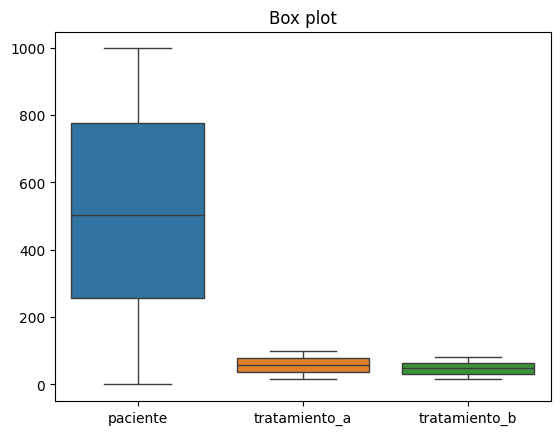

In [58]:
box_plot(df_pacientes_2)

In [59]:
for col in df_pacientes_2.columns:
    print(col, df_pacientes_2[col].isnull().sum(), df_pacientes_2[col].isnull().sum() / df_pacientes_2.shape[0] * 100)

paciente 0 0.0
tratamiento_a 54 5.4
tratamiento_b 140 14.000000000000002


In [66]:
from sklearn.impute import SimpleImputer
np.random.seed(100)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(df_pacientes_2[["tratamiento_a"]])
tratamiento_a_impute = imp_mean.transform(df_pacientes_2[["tratamiento_a"]])

In [68]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
np.random.seed(100)
imputer = IterativeImputer(max_iter=10, random_state=0)
imputer.fit(df_pacientes_2)
data_imputed = imputer.fit_transform(df_pacientes_2)
tratamiento_b_impute = pd.DataFrame(data_imputed)[2]
df_pacientes_2["tratamiento_a"] = tratamiento_a_impute
df_pacientes_2["tratamiento_b"] = tratamiento_b_impute

In [70]:
df_pacientes_2.to_csv("df_pacientes_2_final.csv", header = True, index = False)